# Data Preprocessing

In [ ]:
data <- read.csv("creditworthiness.csv")
head(data,5)

,functionary,re.balanced..paid.back..a.recently.overdrawn.current.acount,FI3O.credit.score,gender,X0..accounts.at.other.banks,credit.refused.in.past.,years.employed,savings.on.other.accounts,self.employed.,max..account.balance.12.months.ago,⋯,max..account.balance.3.months.ago,min..account.balance.3.months.ago,avrg..account.balance.3.months.ago,max..account.balance.2.months.ago,min..account.balance.2.months.ago,avrg..account.balance.2.months.ago,max..account.balance.1.months.ago,min..account.balance.1.months.ago,avrg..account.balance.1.months.ago,credit.rating
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,0,0,4,1,3,3,1,4,⋯,2,1,2,5,2,5,1,5,4,0
2,0,0,1,0,1,0,5,2,1,3,⋯,3,2,1,5,5,5,4,4,1,0
3,0,1,0,1,4,0,3,3,1,5,⋯,3,1,3,3,5,5,5,3,2,0
4,0,1,0,0,5,0,1,1,0,2,⋯,4,4,5,5,5,3,1,1,4,0
5,1,1,1,0,2,0,1,1,0,1,⋯,5,2,5,1,3,4,2,5,5,2


In [ ]:
#select all entries for which the credit rating is known
knownData <- subset(data, data[,46] > 0)

#select all entries for which the credit rating is unknown
unknownData <- subset(data, data[,46] == 0)

In [ ]:
install.packages(c("caret","tree", "rpart", "rpart.plot", "randomForest"))
library(tree)
library(rpart)
library(rpart.plot)
library(randomForest)
library(caret)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice



In [ ]:
# Set the seed
set.seed(123)

## split 50 for training and 50 for testing
set <- sample(1:nrow(knownData),nrow(knownData)/2,
replace=FALSE)
train=knownData[set, ] # Create training set
test=knownData[-set, ] # Create test set

# Convert credit.rating to factor with levels 1, 2, 3
train$credit.rating <- factor(train$credit.rating, levels = c(1, 2, 3))
test$credit.rating <- factor(test$credit.rating, levels = c(1, 2, 3))

In [ ]:
colSums(is.na(train)) #check any missing value

functionary 
                                                          0 
re.balanced..paid.back..a.recently.overdrawn.current.acount 
                                                          0 
                                          FI3O.credit.score 
                                                          0 
                                                     gender 
                                                          0 
                                X0..accounts.at.other.banks 
                                                          0 
                                    credit.refused.in.past. 
                                                          0 
                                             years.employed 
                                                          0 
                                  savings.on.other.accounts 
                                                          0 
                                             self.employed. 
                                                          0 
                         max..account.balance.12.months.ago 
                                                          0 
                         min..account.balance.12.months.ago 
                                                          0 
                        avrg..account.balance.12.months.ago 
                                                          0 
                         max..account.balance.11.months.ago 
                                                          0 
                         min..account.balance.11.months.ago 
                                                          0 
                        avrg..account.balance.11.months.ago 
                                                          0 
                         max..account.balance.10.months.ago 
                                                          0 
                         min..account.balance.10.months.ago 
                                                          0 
                        avrg..account.balance.10.months.ago 
                                                          0 
                          max..account.balance.9.months.ago 
                                                          0 
                          min..account.balance.9.months.ago 
                                                          0 
                         avrg..account.balance.9.months.ago 
                                                          0 
                          max..account.balance.8.months.ago 
                                                          0 
                          min..account.balance.8.months.ago 
                                                          0 
                         avrg..account.balance.8.months.ago 
                                                          0 
                          max..account.balance.7.months.ago 
                                                          0 
                          min..account.balance.7.months.ago 
                                                          0 
                         avrg..account.balance.7.months.ago 
                                                          0 
                          max..account.balance.6.months.ago 
                                                          0 
                          min..account.balance.6.months.ago 
                                                          0 
                         avrg..account.balance.6.months.ago 
                                                          0 
                          max..account.balance.5.months.ago 
                                                          0 
                          min..account.balance.5.months.ago 
                                                          0 
                         avrg..account.balance.5.months.ago 
                                                          0 
                      

After processing the data, we can start training the data

## Decision Tree

In [ ]:
model <- rpart(train$credit.rating ~ ., data = train)
print(model)

n= 981 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 981 488 2 (0.24974516 0.50254842 0.24770642)  
   2) functionary>=0.5 300 147 1 (0.51000000 0.34000000 0.15000000)  
     4) FI3O.credit.score>=0.5 291 138 1 (0.52577320 0.34707904 0.12714777) *
     5) FI3O.credit.score< 0.5 9   1 3 (0.00000000 0.11111111 0.88888889) *
   3) functionary< 0.5 681 290 2 (0.13509545 0.57415565 0.29074890)  
     6) FI3O.credit.score>=0.5 630 248 2 (0.14603175 0.60634921 0.24761905)  
      12) re.balanced..paid.back..a.recently.overdrawn.current.acount>=0.5 584 213 2 (0.15410959 0.63527397 0.21061644) *
      13) re.balanced..paid.back..a.recently.overdrawn.current.acount< 0.5 46  13 3 (0.04347826 0.23913043 0.71739130) *
     7) FI3O.credit.score< 0.5 51   9 3 (0.00000000 0.17647059 0.82352941) *


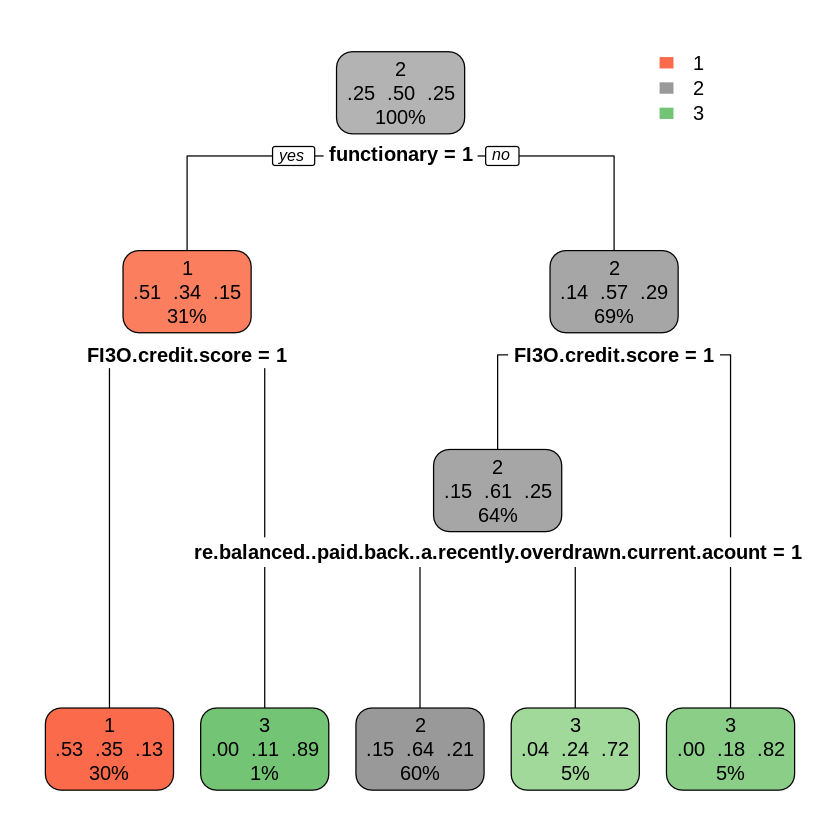

In [ ]:
rpart.plot(model)

In [ ]:
summary(model)

Call:
rpart(formula = train$credit.rating ~ ., data = train)
  n= 981 

          CP nsplit rel error    xerror       xstd
1 0.10450820      0 1.0000000 1.0000000 0.03209069
2 0.06762295      1 0.8954918 0.8954918 0.03189964
3 0.04508197      2 0.8278689 0.8278689 0.03158816
4 0.01639344      3 0.7827869 0.7827869 0.03129614
5 0.01000000      4 0.7663934 0.7889344 0.03134001

Variable importance
                                                functionary 
                                                         47 
                                          FI3O.credit.score 
                                                         35 
re.balanced..paid.back..a.recently.overdrawn.current.acount 
                                                         19 

Node number 1: 981 observations,    complexity param=0.1045082
  predicted class=2  expected loss=0.4974516  P(node) =1
    class counts:   245   493   243
   probabilities: 0.250 0.503 0.248 
  left son=2 (300 obs) right son=3 (681 o

**2c**

In [ ]:
# Generate predictions using decision tree
preds <- predict(model, newdata = test, type ="class")

In [ ]:
levels(test$credit.rating)
levels(preds)


[1] "1" "2" "3"

[1] "1" "2" "3"

In [ ]:
# Calculate the confusion matrix using confusionMatrix() function
cm <- confusionMatrix(test$credit.rating, preds)
print(cm)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 139  92   7
         2  81 366  30
         3  42 146  78

Overall Statistics
                                          
               Accuracy : 0.5943          
                 95% CI : (0.5628, 0.6252)
    No Information Rate : 0.6157          
    P-Value [Acc > NIR] : 0.9206          
                                          
                  Kappa : 0.3283          
                                          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.5305   0.6060  0.67826
Specificity            0.8623   0.7056  0.78291
Pos Pred Value         0.5840   0.7673  0.29323
Neg Pred Value         0.8345   0.5278  0.94825
Prevalence             0.2671   0.6157  0.11723
Detection Rate         0.1417   0.3731  0.07951
Detection Prevalence   0.2426   0.4862  0.27115
Balanced Accuracy      0.6964   0.6558  0

**2d**

The difference in entropy is known as the Information
Gain. Entropy can be used as a criterion to select the best
branching variables and cutpoints, although it is not the
only possibility.

*Entropy of the root node:*

Entropy_root = - (0.24974516 * log2(0.24974516) + 0.50254842 * log2(0.50254842) + 0.24770642 * log2(0.24770642))

Entropy_root = 1.497

*Entropy of the left child node:*
Entropy_left_child = - (0.51 * log2(0.51) + 0.34 * log2(0.34) + 0.15 * log2(0.15))

Entropy_left_child = 1.435


*Entropy of the right child node:*
Entropy_right_child = - (0.13509545 * log2(0.13509545) + 0.57415565 * log2(0.57415565) + 0.29074890 * log2(0.29074890))

Entropy_right_child = 1.368

*Weighted average entropy of the child nodes:*
(1.435+1.368)/2 = 1.401

*Information gain after the first split:
 1.497 - 1.401 = 0.096 = ~ 0.10

## Random Forest

In [ ]:
library(randomForest)

In [ ]:
# Build the random forest classifier
rf <- randomForest(credit.rating ~ ., data = train, ntree = 100)



In [ ]:
# Predictions on train data
p1 <- predict(rf, train)

# Create a confusion matrix from the predictions and actual values
cm <- table(train$credit.rating, p1)

# Calculate accuracy
accuracy <- sum(diag(cm)) / sum(cm)

# Print the confusion matrix
print(cm)

# Print the accuracy
print(accuracy)


   p1
      1   2   3
  1 240   5   0
  2   1 492   0
  3   0   3 240
[1] 0.9908257


In [ ]:
# confusion matrix for test data
p2 <- predict(rf, test)

# Create a confusion matrix from the predictions and actual values
cm <- table(test$credit.rating, p2)

# Calculate accuracy
accuracy <- sum(diag(cm)) / sum(cm)

# Print the confusion matrix
print(cm)

# Print the accuracy
print(accuracy)


   p2
      1   2   3
  1  70 150  18
  2  70 348  59
  3  42 160  64
[1] 0.4913354


The accuracy of decision tree is 59%, whereas Random forest produces a 57% accuracy


# SVM

In [ ]:
install.packages(c("caTools", "e1071"))
library("dplyr")
library("caTools")
library("e1071")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’



Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Use support vector machine to predict the credit ratings of customers using all of the other variables in
the dataset

In [ ]:
#default svm setting
svm_model <- svm(credit.rating ~ ., data = train)


After fitting the SVM model, we can now predict the credit rating of a new customer. For example, if a hypothetical “median” customer, i.e., one with the attributes value as below, we can predict their credit rating.

In [ ]:
#create a dataframe to store median customer

customer <- data.frame(
  functionary = 0,
  re.balanced..paid.back..a.recently.overdrawn.current.acount = 1,
  FI3O.credit.score = 1,
  gender = 0,
  X0..accounts.at.other.banks  = 3,
  credit.refused.in.past. = 0,
  years.employed = 3,
  savings.on.other.accounts = 3,
  self.employed. = 0,
  max..account.balance.12.months.ago = 3,
  min..account.balance.12.months.ago = 3,
  avrg..account.balance.12.months.ago = 3,
  max..account.balance.11.months.ago = 3,
  min..account.balance.11.months.ago = 3,
  avrg..account.balance.11.months.ago = 3,
  max..account.balance.10.months.ago = 3,
  min..account.balance.10.months.ago = 3,
  avrg..account.balance.10.months.ago = 3,
  max..account.balance.9.months.ago = 3,
  min..account.balance.9.months.ago = 3,
  avrg..account.balance.9.months.ago = 3,
  max..account.balance.8.months.ago = 3,
  min..account.balance.8.months.ago = 3,
  avrg..account.balance.8.months.ago = 3,
  max..account.balance.7.months.ago = 3,
  min..account.balance.7.months.ago = 3,
  avrg..account.balance.7.months.ago = 3,
  max..account.balance.6.months.ago = 3,
  min..account.balance.6.months.ago = 3,
  avrg..account.balance.6.months.ago = 3,
  max..account.balance.5.months.ago = 3,
  min..account.balance.5.months.ago = 3,
  avrg..account.balance.5.months.ago = 3,
  max..account.balance.4.months.ago = 3,
  min..account.balance.4.months.ago = 3,
  avrg..account.balance.4.months.ago = 3,
  max..account.balance.3.months.ago = 3,
  min..account.balance.3.months.ago = 3,
  avrg..account.balance.3.months.ago = 3,
  max..account.balance.2.months.ago = 3,
  min..account.balance.2.months.ago = 3,
  avrg..account.balance.2.months.ago = 3,
  max..account.balance.1.months.ago = 3,
  min..account.balance.1.months.ago = 3,
  avrg..account.balance.1.months.ago = 3
)


In [ ]:
svm_pred_customer <- predict(svm_model, newdata = customer)

svm_pred_customer


1 
2 
Levels: 1 2 3

The customer is predicted to have a credit rating = 1, with the decision values = 2. A higher absolute value of the decision value indicates a higher confidence in the prediction. In this case, a decision value of "2" suggests that the SVM model is relatively confident in assigning the customer to class "1".

In [ ]:
#predict the credit rating for test set
svm_pred <- predict(svm_model, newdata = test)

#connfusion martix for test set
svm_cm <- table(Reference = test$credit.rating, Prediction = svm_pred)

print(cm)

   p2
      1   2   3
  1  70 150  18
  2  70 348  59
  3  42 160  64


In [ ]:
#calculate accuracy
accuracy_svm <- sum(diag(as.matrix(svm_cm))) /sum(svm_cm)
print(accuracy_svm)

[1] 0.587156


## Tuning SVM

In [ ]:
svm_model <- svm(credit.rating ~ ., data = train, kernel = "linear", gamma = 0.5)


In [ ]:
#predict the credit rating for test set
svm_pred <- predict(svm_model, newdata = test)

#connfusion martix for test set
svm_cm <- table(Reference = test$credit.rating, Prediction = svm_pred)

#calculate accuracy
accuracy_svm <- sum(diag(as.matrix(svm_cm))) /sum(svm_cm)
print(accuracy_svm)

[1] 0.5993884


# Naive Bayes Model

In [ ]:
install.packages(c("naivebayes"))
library(naivebayes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

naivebayes 0.9.7 loaded



In [ ]:
# Create the Naive Bayes model
nb_model <- naiveBayes(credit.rating ~ ., data = train)


Similarly, we can predict the credit rating of the hypothetical customer.
From the result, using Naive Bayes, the customer has a 98.96% chance of having the credit rating = 1.

In [ ]:
# Make predictions on the customer with predicted probabilities
nb_probs_customer <- predict(nb_model, newdata = customer, type = "raw")

# Print the predicted probabilities
nb_probs_customer

1,2,3
0.9896109,0.009929232,0.0004598345


In [ ]:
# Extract the model output
nb_output <- nb_model$tables
# Subset the output for the first 10 lines
nb_output_subset <- head(nb_output, 10)
# Print the subset of the output
print(nb_output_subset)

$functionary
   functionary
Y        [,1]      [,2]
  1 0.6244898 0.4852457
  2 0.2068966 0.4054922
  3 0.1851852 0.3892495

$re.balanced..paid.back..a.recently.overdrawn.current.acount
   re.balanced..paid.back..a.recently.overdrawn.current.acount
Y        [,1]       [,2]
  1 0.9918367 0.09016546
  2 0.9695740 0.17193075
  3 0.8312757 0.37528119

$FI3O.credit.score
   FI3O.credit.score
Y        [,1]      [,2]
  1 1.0000000 0.0000000
  2 0.9797160 0.1411132
  3 0.7942387 0.4050912

$gender
   gender
Y        [,1]      [,2]
  1 0.5469388 0.4988109
  2 0.4929006 0.5004574
  3 0.4691358 0.5000765

$X0..accounts.at.other.banks
   X0..accounts.at.other.banks
Y       [,1]     [,2]
  1 2.967347 1.419621
  2 3.050710 1.445298
  3 3.234568 1.459692

$credit.refused.in.past.
   credit.refused.in.past.
Y         [,1]      [,2]
  1 0.04081633 0.1982695
  2 0.09127789 0.2882964
  3 0.23456790 0.4246030

$years.employed
   years.employed
Y       [,1]     [,2]
  1 3.008163 1.411289
  2 3.034483 1.411

In [ ]:
# Make predictions on the test set
nb_preds <- predict(nb_model, newdata = test)

# Print the confusion matrix
cm <- table(test$credit.rating, nb_preds)
print(cm)

# Calculate accuracy
accuracy <- sum(diag(cm)) / sum(cm)
print(accuracy)


   nb_preds
      1   2   3
  1 226   1  11
  2 401  18  58
  3 142  12 112
[1] 0.362895


## Analysis

So, for this dataset, SVM seems to be the best classifier bases on the overall accuracy rate. On the contrary, Naive Bayes can be considered the worst model with the lowest accuracy rate.
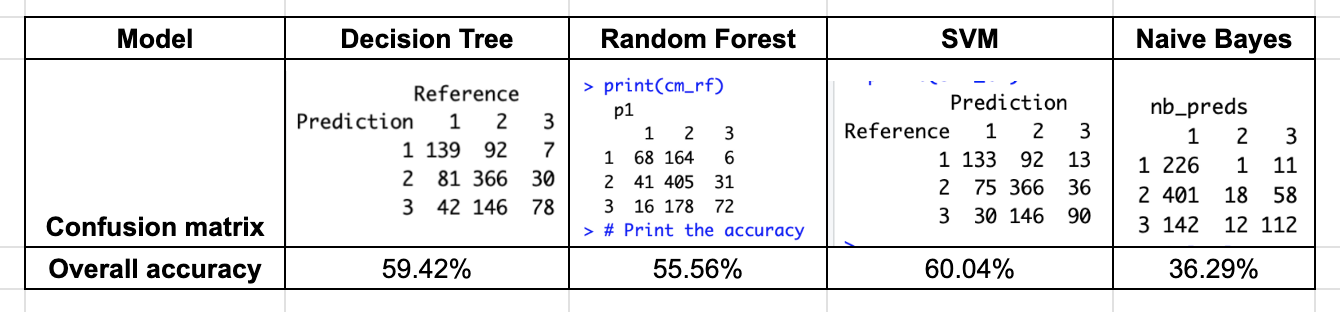

# Logistic Regression

In [ ]:
install.packages(c("pROC"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("pROC")

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [ ]:
# Load the nnet package
library(nnet)
# Fit the multinomial logistic regression model
lr_model <- glm(credit.rating == "1" ~ ., data = train, family = binomial)
lr_preds <- predict(lr_model, newdata = test)
# View the model summary
summary(lr_model)



Call:
glm(formula = credit.rating == "1" ~ ., family = binomial, data = train)

Coefficients:
                                                              Estimate
(Intercept)                                                 -16.967890
functionary                                                   1.951383
re.balanced..paid.back..a.recently.overdrawn.current.acount   2.007671
FI3O.credit.score                                            16.204181
gender                                                        0.110848
X0..accounts.at.other.banks                                  -0.077863
credit.refused.in.past.                                      -1.297887
years.employed                                                0.797981
savings.on.other.accounts                                    -0.678957
self.employed.                                                0.013329
max..account.balance.12.months.ago                           -0.098037
min..account.balance.12.months.ago                   

The Logistic Regression model's summary consists of the feature coefficients, which can be utilized to create a linear equation for forecasting credit ratings. Additionally, it provides information about the statistical significance of all the features, enabling the identification of the most important features for the analysis.

Below are the features that are significant at a 5% significance level. We can get this from the summary table above, taking the features that has at least one * (5%). The higher the star, the more significant. Similarly, the smaller the Pr(>|z|), the better.

1.   functionary
2.   re.balanced..paid.back..a.recently.overdrawn.current.acount
3. "credit.refused.in.past."
4. "years.employed"
5. "savings.on.other.accounts"
6. "avrg..account.balance.12.months.ago"
7. "min..account.balance.10.months.ago"
8. "avrg..account.balance.6.months.ago"
9. "avrg..account.balance.1.months.ago"

In [ ]:
# Predict probabilities for the customer data
probabilities <- predict(lr_model, newdata = customer, type = "response")
# View the probabilities
probabilities

1 
0.1896881

The customer has a 19% of having the credit rating = 1